In [1]:
import gymnasium as gym
from bettermdptools.algorithms.planner import Planner
from bettermdptools.utils.plots import Plots
from bettermdptools.algorithms.rl import RL
from bettermdptools.utils.test_env import TestEnv
import numpy as np
from bettermdptools.utils.blackjack_wrapper import BlackjackWrapper
import seaborn as sns
import matplotlib.pyplot as plt
from bettermdptools.utils.decorators import add_to
import pandas as pd

In [2]:

# make gym environment 
blackjack = gym.make('Blackjack-v1', render_mode=None)
blackjack.reset(seed=42)
blackjack = BlackjackWrapper(blackjack)

In [3]:
@add_to(Plots)
@staticmethod
def modified_values_heat_map(data, title, size):
    data = np.around(np.array(data).reshape(size), 2)
    df = pd.DataFrame(data=data)
    sns.heatmap(df, annot=True, annot_kws={"fontsize":8}).set_title(title)
    plt.show()

@add_to(Plots)
@staticmethod
def modified_plot_policy(val_max, directions, map_size, title):
    """Plot the policy learned."""
    sns.heatmap(
        val_max,
        annot=directions,
        fmt="",
        cmap=sns.color_palette("magma_r", as_cmap=True),
        linewidths=0.7,
        linecolor="black", annot_kws={"fontsize":8}
    ).set(title=title)
    img_title = f"Policy_{map_size[0]}x{map_size[1]}.png"
    plt.show()

In [4]:
# VI
V, V_track, pi = Planner(blackjack.P).value_iteration()

runtime = 0.02 seconds


In [5]:
a = []
for i in range(50):
    test_scores = TestEnv.test_env(env=blackjack, n_iters=100, render=False, pi=pi, user_input=False)
    a.append(test_scores)
print(np.mean(a))

/home/suhendro/miniconda3/envs/mlhw4/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


-0.0408


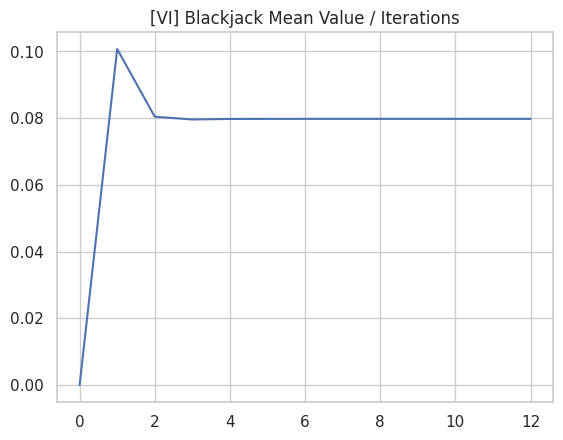

In [6]:

# mean_V / iter
max_value_per_iter = np.trim_zeros(np.mean(V_track, axis=1), 'b')
Plots.v_iters_plot(max_value_per_iter, "[VI] Blackjack Mean Value / Iterations")


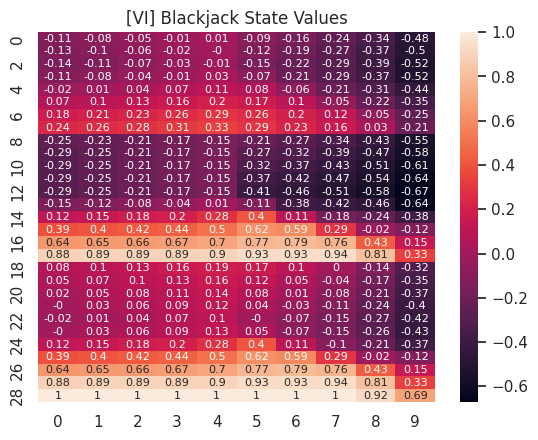

In [9]:

#state values plot
size=(29,10)
Plots.modified_values_heat_map(V, "[VI] Blackjack State Values", size)

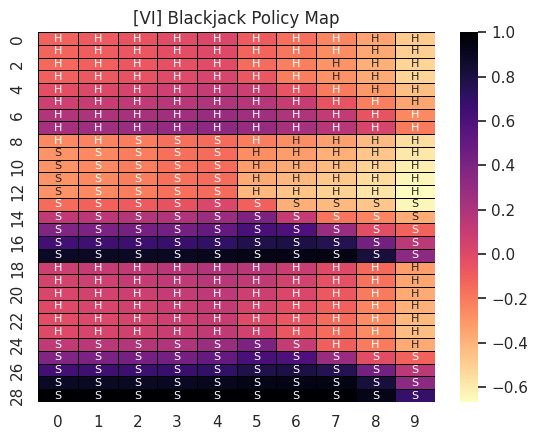

In [10]:
#plot state values
blackjack_actions = {0: "S", 1: "H"}
blackjack_map_size=(29, 10)

#get formatted state values and policy map
val_max, policy_map = Plots.get_policy_map(pi, V, blackjack_actions, blackjack_map_size)

title="[VI] Blackjack Policy Map"

Plots.modified_plot_policy(val_max, policy_map, blackjack_map_size, title)